In [1]:
import numpy as np
import pandas as pd

import geopandas as gpd

from urllib.request import urlopen, Request
from urllib.parse import urlencode
from xmltodict import parse

import osmnx as ox

import matplotlib.pyplot as plt
import networkx as nx


from prettymaps import *
from descartes import PolygonPatch

import plotly.express as px
import plotly.graph_objects as go

from mpl_toolkits.basemap import Basemap

# Basic Maps

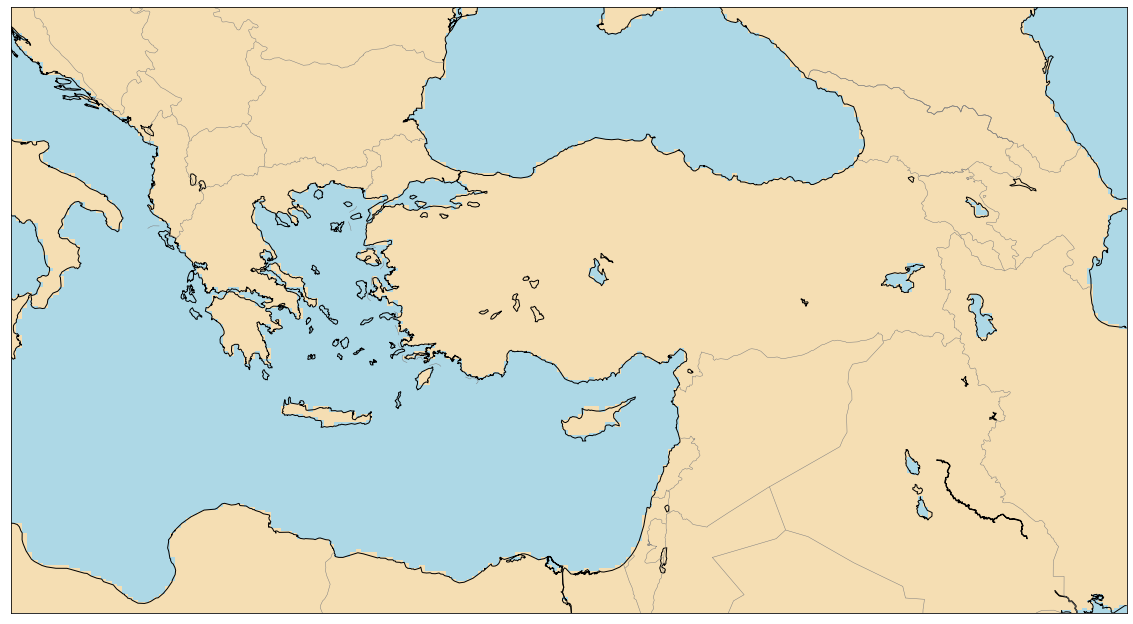

In [2]:
m = Basemap(projection='merc',
           llcrnrlat=30,
           urcrnrlat=45,
           llcrnrlon=15,
           urcrnrlon=50,
           resolution='i')

fig = plt.figure(figsize=(20,12))

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='wheat', ocean_color='lightblue')
plt.show()

In [3]:
fig = go.Figure(go.Scattermapbox(
    lon = [], lat = []))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': 32, 'lat': 40},
        'zoom': 4},
    showlegend = True)

fig.show()

In [4]:
fig = go.Figure(go.Scattermapbox(
    lon = [], lat = []))

fig.update_layout(
    mapbox = {
        'style': "open-street-map",
        'center': {'lon': 28.975, 'lat': 41.025},
        'zoom': 12},
    showlegend = True)

fig.show()

In [5]:
baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?'

params = {'starttime': '1995-01-01',
          'endtime': '2022-03-01',
          'minlatitude': 39,
          'maxlatitude': 43,
          'minlongitude': 23,
          'maxlongitude': 33,
          'minmagnitude': 3.0,
          'eventtype': 'earthquake',
          'producttype': 'origin'}

url = baseurl + urlencode(params) 

with urlopen(url) as conn:
    quakes = pd.read_csv(conn)

In [6]:
fig = px.density_mapbox(quakes, lat='latitude', lon='longitude', z='mag', radius=8)

fig.update_layout(
    mapbox = {
        'style': 'white-bg',
        'center': {'lon': 27, 'lat': 40.5},
        'zoom': 6
    },
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])

fig.show()

## Artistic Maps

In [7]:
areaBesiktas = ox.geocode_to_gdf("Beşiktaş, İstanbul, Turkey")
graphBesiktas = ox.graph_from_place("Beşiktaş, İstanbul, Turkey")
nodesBesiktas, edgesBesiktas = ox.graph_to_gdfs(graphBesiktas)

buildingsBesiktas = ox.geometries_from_place("Beşiktaş, İstanbul, Turkey", tags={'building':True})
parksBesiktas = ox.geometries_from_place("Beşiktaş, İstanbul, Turkey", tags={'leisure':True})

/home/kaygun/.local/lib/python3.10/site-packages/urllib3/util/ssl_.py:260: DeprecationWarning:

ssl.PROTOCOL_TLS is deprecated

/home/kaygun/.local/lib/python3.10/site-packages/urllib3/connection.py:407: DeprecationWarning:

ssl.match_hostname() is deprecated

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/home/kaygun/.local/lib/python3.10/site-packages/osmn

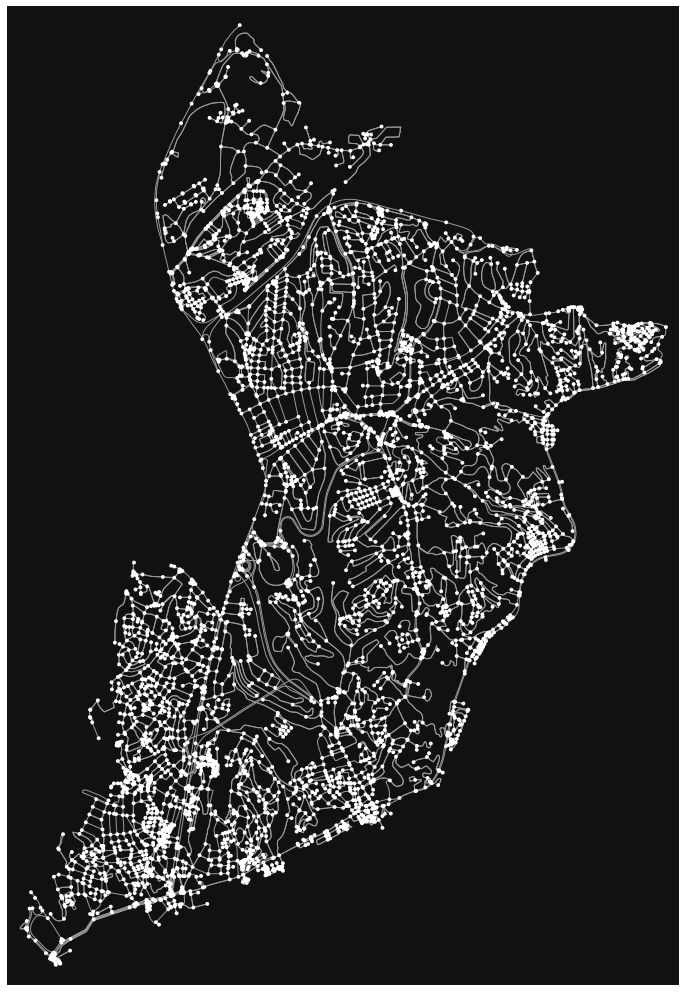

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = ox.plot_graph(graphBesiktas,figsize=(24,18))
plt.tight_layout()

<AxesSubplot:>

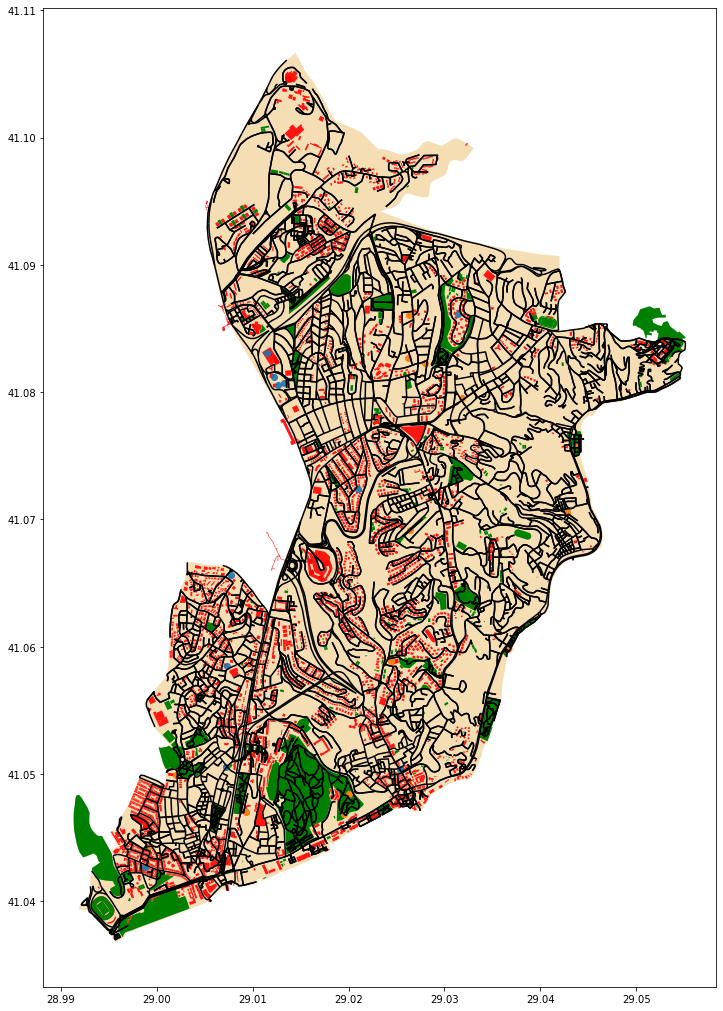

In [9]:
fix,ax = plt.subplots(figsize=(24,18))
areaBesiktas.plot(ax=ax,facecolor='wheat')
edgesBesiktas.plot(ax=ax,edgecolor='black')
buildingsBesiktas.plot(ax=ax,facecolor="red",alpha=0.9)
parksBesiktas.plot(ax=ax,facecolor='green')

In [9]:
def plotTown(name):
    graph = ox.graph_from_place(name)
    area = ox.geocode_to_gdf(name)
    nodes, edges = ox.graph_to_gdfs(graph)
    buildings = ox.geometries_from_place(name, tags={'building':True})
    parks = ox.geometries_from_place(name, tags={'leisure':True})
    fix,ax = plt.subplots(figsize=(24,18))
    area.plot(ax=ax,facecolor='wheat')
    edges.plot(ax=ax,edgecolor='black')
    buildings.plot(ax=ax,facecolor="red",alpha=0.5)
    parks.plot(ax=ax,facecolor='green')

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the

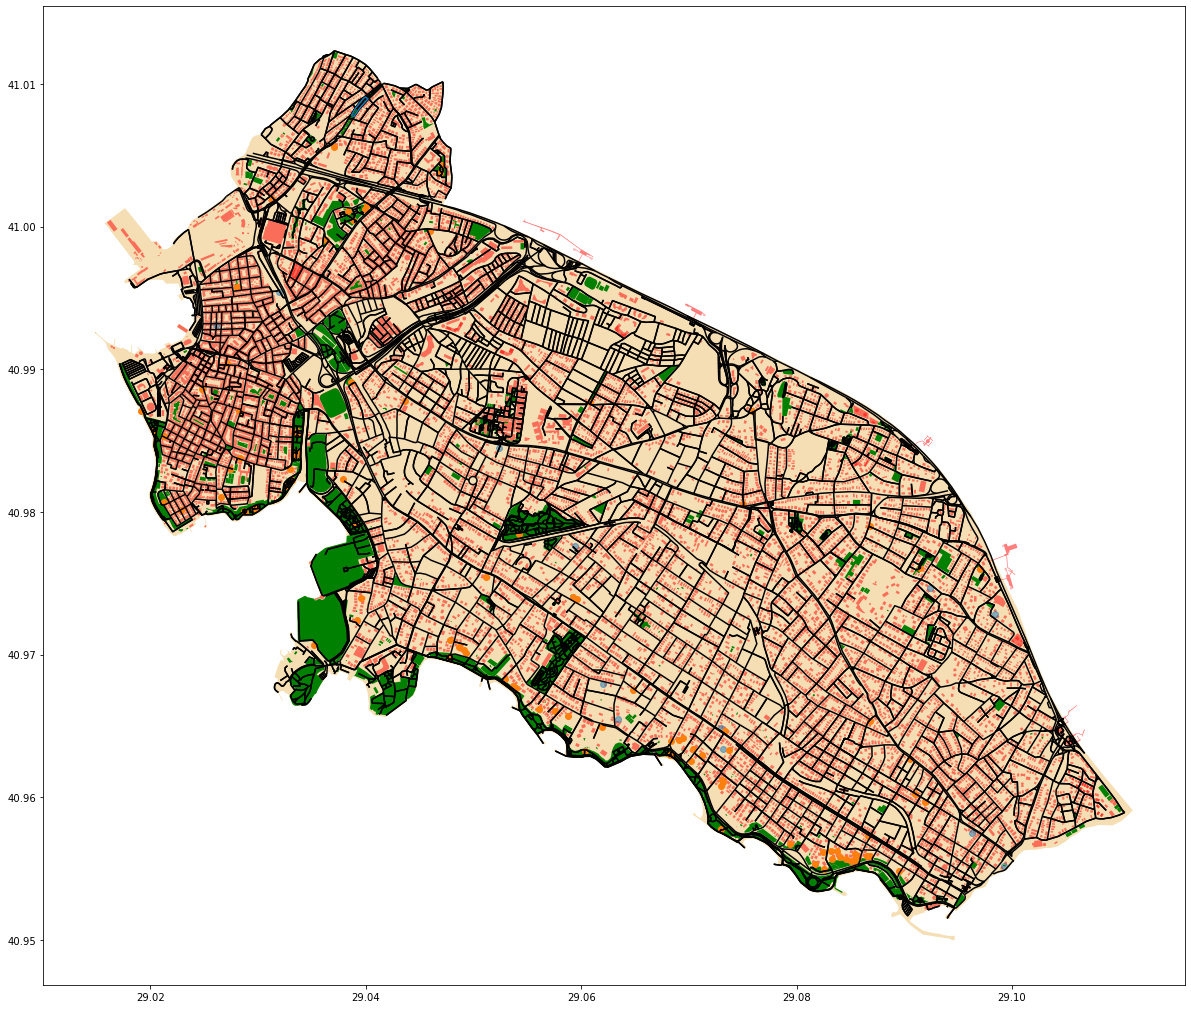

In [10]:
plotTown("Kadıköy, İstanbul, Turkey")

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the

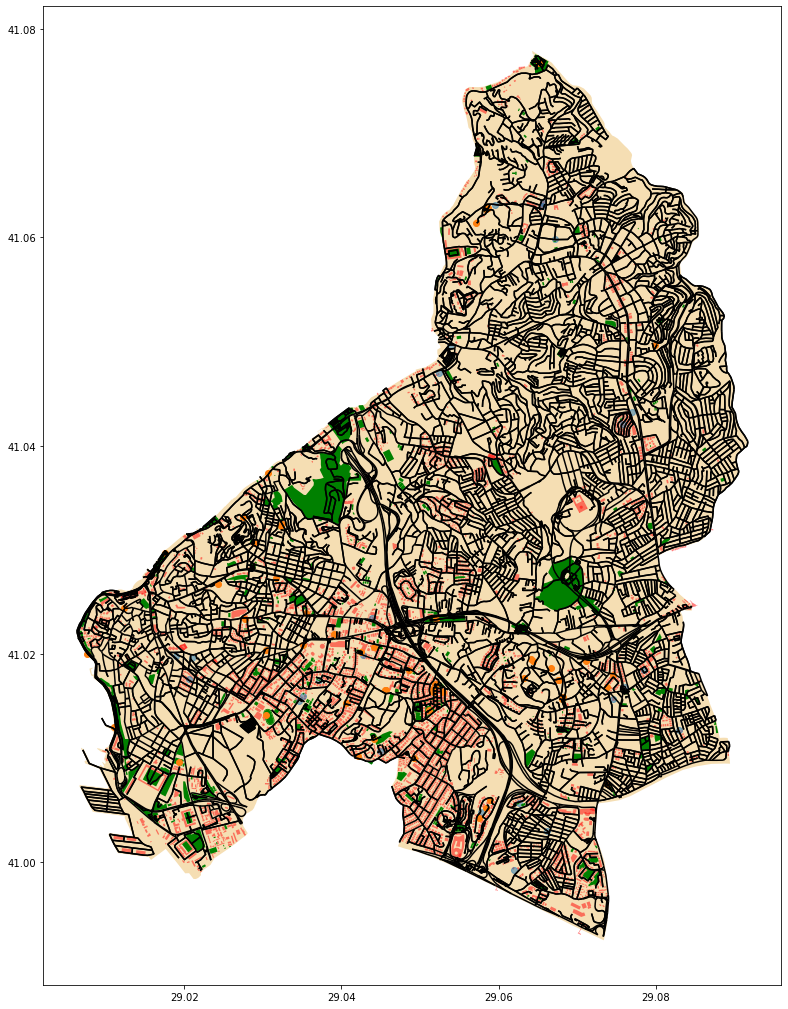

In [11]:
plotTown('Üsküdar, İstanbul, Turkey')

In [11]:
def plotPlace(place,rad=1500,dilate=100):
    
    fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

    plot(
        place, 
        radius = rad,
        ax = ax,
        layers = {
            'perimeter': {'circle': False, 'dilate': dilate},
            'streets': {
                'width': {
                'primary': 5,
                'secondary': 4,
                'tertiary': 3,
                'residential': 2,
                'footway': 1,
                },
            'circle': False,
            'dilate': dilate
            },
            'building': {
                'tags': {'building': True},
                'union': False,
                'circle': False,
                'dilate': dilate
            },
            'green': {
                'tags': {
                'landuse': ['grass', 'village_green'],
                'leisure': 'park'
                },
            'circle': False,
            'dilate': dilate
            },
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        })


/home/kaygun/.local/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/home/kaygun/.local/lib/python3.10/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0

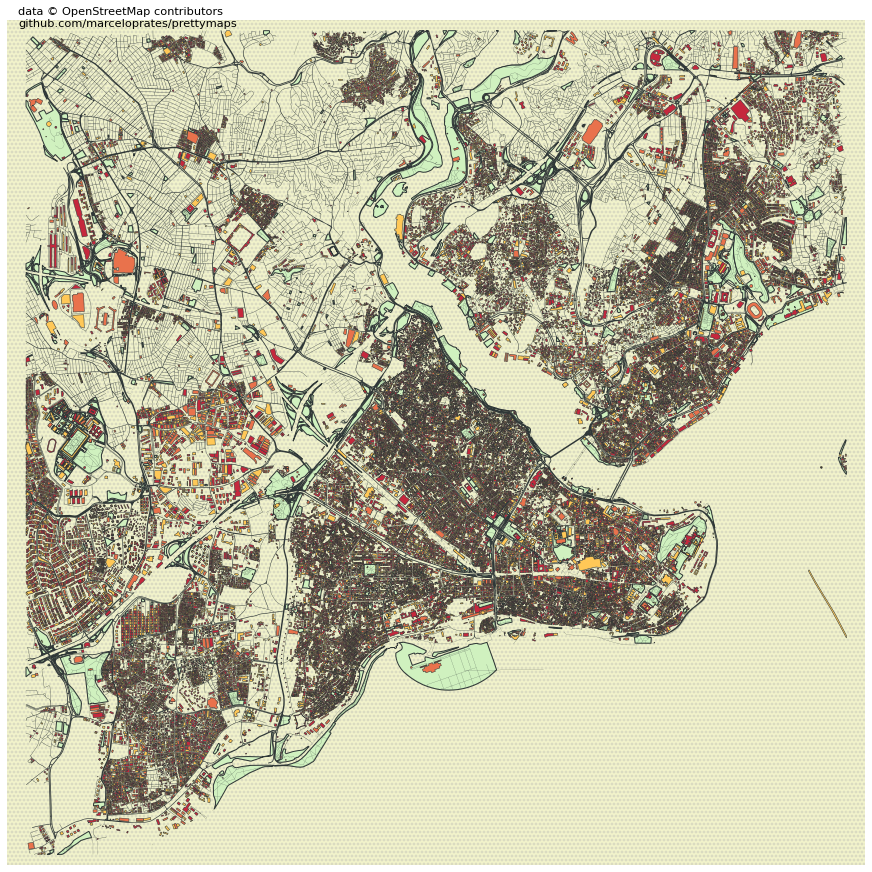

In [12]:
plotPlace((41.025,28.945),rad=5200)